# Using Pytorch

Also supports CNNs and RNNs and is useful in deep learning situations. Supports large and complex applications and also supports GPU processing. It is a direct competitor to tensorflow. 

### Setup and load the data

In [42]:
import torch
torch.__version__

'1.6.0'

In [43]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import torch.nn as nn

In [44]:
breast = datasets.load_breast_cancer()

In [46]:
breast.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [47]:
breast.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [48]:
breast.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [49]:
inputs = breast.data
inputs.shape

(569, 30)

In [50]:
outputs = breast.target
outputs.shape

(569,)

### Data Transformation

In [51]:
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.25)

In pytorch, we need a specific type of variable for processing. Currently our values are numpy arrays

In [52]:
x_train = torch.tensor(x_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)

In [53]:
type(x_train)

torch.Tensor

In [54]:
dataset = torch.utils.data.TensorDataset(x_train, y_train)

In [55]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [56]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10)

### Neural network structure

In [57]:
# 30 inputs -> 16 -> 16 -> 1
network = nn.Sequential(nn.Linear(in_features=30, out_features=16), 
                        nn.Sigmoid(),
                        nn.Linear(16, 16), 
                        nn.Sigmoid(), 
                        nn.Linear(16, 1),
                        nn.Sigmoid())

In [58]:
network.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [59]:
# BCELoss males a good choice because we are working on a 
# binary problem. 
loss_function = nn.BCELoss()

In [60]:
optimizer = torch.optim.Adam(network.parameters(), lr=0.001)

In [61]:
epochs = 100
for epoch in range(epochs):
    running_loss = 0.
    
    for data in train_loader:
        inputs, outputs = data
        #print(f"input: {inputs}")
        #print("-" * 30)
        #print(f"output: {outputs}")
        optimizer.zero_grad()
        
        # calculate the prediction
        preds = network.forward(inputs)
        
        # calculate the loss from the prediction and oututs 
        loss = loss_function(preds, outputs)
        
        # apply the back propagation 
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print(f"epoch: {epoch + 1} loss: {running_loss / len(train_loader)}")

epoch: 1 loss: 0.6576544379079065
epoch: 2 loss: 0.6462319992309393
epoch: 3 loss: 0.6336661265339962
epoch: 4 loss: 0.618097303911697
epoch: 5 loss: 0.5980088419692461
epoch: 6 loss: 0.5755854796531589
epoch: 7 loss: 0.5476496150327284
epoch: 8 loss: 0.5177340257999509
epoch: 9 loss: 0.4864297121070152
epoch: 10 loss: 0.4536935624688171
epoch: 11 loss: 0.42474859745003457
epoch: 12 loss: 0.3993731057921121
epoch: 13 loss: 0.3732673196598541
epoch: 14 loss: 0.35714259258536407
epoch: 15 loss: 0.33724694889645246
epoch: 16 loss: 0.3230219521494799
epoch: 17 loss: 0.31148067116737366
epoch: 18 loss: 0.30080027774322865
epoch: 19 loss: 0.28258282569951787
epoch: 20 loss: 0.2753249645926232
epoch: 21 loss: 0.2657312473585439
epoch: 22 loss: 0.26586922015561615
epoch: 23 loss: 0.26272123774816825
epoch: 24 loss: 0.2684975524627885
epoch: 25 loss: 0.24393565866143205
epoch: 26 loss: 0.24983444827240567
epoch: 27 loss: 0.25211735762829
epoch: 28 loss: 0.25699085880850636
epoch: 29 loss: 0.238

### Evaluate

In [62]:
network.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [63]:
x_test.shape, type(x_test)

((143, 30), numpy.ndarray)

In [64]:
# transofrm 
x_test = torch.tensor(x_test, dtype=torch.float)
type(x_test)

torch.Tensor

In [65]:
preds = network.forward(x_test)
preds

tensor([[0.9829],
        [0.0135],
        [0.9003],
        [0.0135],
        [0.0135],
        [0.9835],
        [0.8897],
        [0.0135],
        [0.9836],
        [0.0135],
        [0.9835],
        [0.9835],
        [0.9707],
        [0.9822],
        [0.6481],
        [0.9814],
        [0.0135],
        [0.9018],
        [0.0135],
        [0.9836],
        [0.0135],
        [0.0278],
        [0.0144],
        [0.8929],
        [0.0135],
        [0.9383],
        [0.9792],
        [0.9836],
        [0.9068],
        [0.9804],
        [0.0135],
        [0.9792],
        [0.9402],
        [0.9020],
        [0.9835],
        [0.8570],
        [0.0135],
        [0.0135],
        [0.8987],
        [0.9079],
        [0.9826],
        [0.9013],
        [0.9830],
        [0.8939],
        [0.9831],
        [0.9764],
        [0.9836],
        [0.9805],
        [0.9836],
        [0.9409],
        [0.9833],
        [0.9829],
        [0.9017],
        [0.0136],
        [0.9836],
        [0

In [66]:
preds = np.array(preds > 0.5)
preds 

array([[ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [

In [67]:
accuracy_score(y_test, preds)

0.9230769230769231

In [68]:
cm = confusion_matrix(y_test, preds)

/usr/local/Caskroom/miniconda/base/envs/pykit/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/Caskroom/miniconda/base/envs/pykit/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<AxesSubplot:>

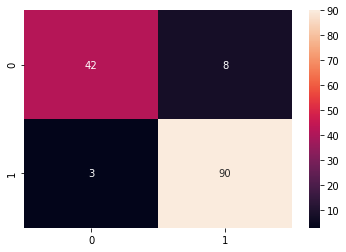

In [70]:
import seaborn as sns
sns.heatmap(cm, annot=True)